In [1]:
import pandas as pd
import requests
import os
from citipy import citipy
from matplotlib import pyplot as plt
import numpy as np
import scipy.stats as stats
import random
from pprint import pprint

In [2]:
file = os.path.join("Rice-Boot-Camp-Project-1","Source Databases","GDP_POP_Energy.csv")
GDP = pd.read_csv(file)

In [3]:
file = os.path.join("Rice-Boot-Camp-Project-1","Source Databases","Country Codes.csv")
CC = pd.read_csv(file)

In [4]:
file = os.path.join("Rice-Boot-Camp-Project-1","InvestmentData.csv")
Inv = pd.read_csv(file)

In [5]:
file = os.path.join("Rice-Boot-Camp-Project-1","Source Databases","WTI Price v Time.csv")
Oil = pd.read_csv(file)

In [6]:
file = os.path.join("LatLng.csv")
LatLng = pd.read_csv(file)

In [7]:
CC=CC.rename(columns={"alpha-3":"Country Code"})

In [8]:
Master=GDP.merge(CC,how="inner",on="Country Code")

In [9]:
Master.head()

,Country Code,Date,GDP,GDP Per Capita,Population,Country Name,Time Code,Access to Clean Fuels and Technologies for cooking (% of total population) [2.1_ACCESS.CFT.TOT],Access to electricity (% of rural population with access) [1.2_ACCESS.ELECTRICITY.RURAL],Access to electricity (% of total population) [1.1_ACCESS.ELECTRICITY.TOT],...,name,alpha-2,country-code,iso_3166-2,region,sub-region,intermediate-region,region-code,sub-region-code,intermediate-region-code
0,USA,2016.0,1.870719e+13,59028.590080,322941311.0,United States,YR2016,100,100,100,...,United States of America,US,840,ISO 3166-2:US,Americas,Northern America,NaN,19.0,21.0,NaN
1,USA,2015.0,1.821930e+13,58535.768020,320635163.0,United States,YR2015,100,100,100,...,United States of America,US,840,ISO 3166-2:US,Americas,Northern America,NaN,19.0,21.0,NaN
2,USA,2014.0,1.752175e+13,57313.859702,318301008.0,United States,YR2014,100,100,100,...,United States of America,US,840,ISO 3166-2:US,Americas,Northern America,NaN,19.0,21.0,NaN
3,USA,2013.0,1.678485e+13,56350.645973,315993715.0,United States,YR2013,100,100,100,...,United States of America,US,840,ISO 3166-2:US,Americas,Northern America,NaN,19.0,21.0,NaN
4,USA,2012.0,1.619701e+13,55712.705832,313830990.0,United States,YR2012,100,100,100,...,United States of America,US,840,ISO 3166-2:US,Americas,Northern America,NaN,19.0,21.0,NaN


In [10]:
renewable="Renewable electricity output (GWh) [4.1.2_REN.ELECTRICITY.OUTPUT]"
percent="Renewable electricity share of total electricity output (%) [4.1_SHARE.RE.IN.ELECTRICITY]"
total="Total electricity output (GWh) [4.1.1_TOTAL.ELECTRICITY.OUTPUT]"

In [11]:
problem=Master[Master[renewable]==".."].index
Master=Master.drop(problem)
Master[renewable]=Master[renewable].astype("float")

problem=Master[Master[percent]==".."].index
Master=Master.drop(problem)
Master[percent]=Master[percent].astype("float")

problem=Master[Master[total]==".."].index
Master=Master.drop(problem)
Master[total]=Master[total].astype("float")

In [12]:
Master.head()

,Country Code,Date,GDP,GDP Per Capita,Population,Country Name,Time Code,Access to Clean Fuels and Technologies for cooking (% of total population) [2.1_ACCESS.CFT.TOT],Access to electricity (% of rural population with access) [1.2_ACCESS.ELECTRICITY.RURAL],Access to electricity (% of total population) [1.1_ACCESS.ELECTRICITY.TOT],...,name,alpha-2,country-code,iso_3166-2,region,sub-region,intermediate-region,region-code,sub-region-code,intermediate-region-code
1,USA,2015.0,1.821930e+13,58535.768020,320635163.0,United States,YR2015,100,100,100,...,United States of America,US,840,ISO 3166-2:US,Americas,Northern America,NaN,19.0,21.0,NaN
2,USA,2014.0,1.752175e+13,57313.859702,318301008.0,United States,YR2014,100,100,100,...,United States of America,US,840,ISO 3166-2:US,Americas,Northern America,NaN,19.0,21.0,NaN
3,USA,2013.0,1.678485e+13,56350.645973,315993715.0,United States,YR2013,100,100,100,...,United States of America,US,840,ISO 3166-2:US,Americas,Northern America,NaN,19.0,21.0,NaN
4,USA,2012.0,1.619701e+13,55712.705832,313830990.0,United States,YR2012,100,100,100,...,United States of America,US,840,ISO 3166-2:US,Americas,Northern America,NaN,19.0,21.0,NaN
5,USA,2011.0,1.554258e+13,54884.707368,311556874.0,United States,YR2011,100,100,100,...,United States of America,US,840,ISO 3166-2:US,Americas,Northern America,NaN,19.0,21.0,NaN


In [13]:
Master.dtypes

Country Code                                                                                        object
Date                                                                                               float64
GDP                                                                                                float64
GDP Per Capita                                                                                     float64
Population                                                                                         float64
Country Name                                                                                        object
Time Code                                                                                           object
Access to Clean Fuels and Technologies for cooking (% of total population) [2.1_ACCESS.CFT.TOT]     object
Access to electricity (% of rural population with access) [1.2_ACCESS.ELECTRICITY.RURAL]            object
Access to electricity (% of total pop

In [14]:


DateGB=Master.groupby("Date")
DateGB[percent].mean()


Date
1990.0    30.512040
1991.0    30.921389
1992.0    30.278715
1993.0    31.048188
1994.0    31.162057
1995.0    30.546308
1996.0    30.432610
1997.0    29.526377
1998.0    29.108961
1999.0    29.300520
2000.0    29.887379
2001.0    29.223538
2002.0    29.174865
2003.0    28.720677
2004.0    28.481008
2005.0    28.534838
2006.0    28.093584
2007.0    28.324256
2008.0    28.905785
2009.0    29.363888
2010.0    29.964989
2011.0    29.525441
2012.0    29.991549
2013.0    31.027560
2014.0    31.222655
2015.0    31.292677
Name: Renewable electricity share of total electricity output (%) [4.1_SHARE.RE.IN.ELECTRICITY], dtype: float64

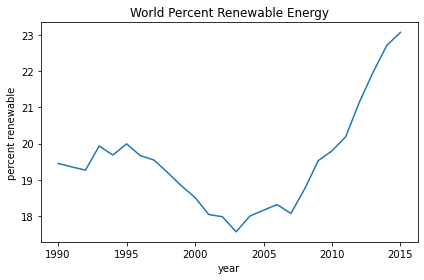

In [15]:
WorldRenew=DateGB[renewable].sum()/DateGB[total].sum()*100
plt.plot(WorldRenew)
plt.title("World Percent Renewable Energy")
plt.xlabel("year")
plt.ylabel("percent renewable")
plt.tight_layout()

file = os.path.join("WorldPercentRenewableEnergy.png")
plt.savefig(file)

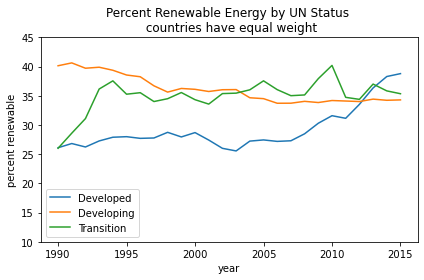

In [16]:
devel=Master[Master["UN Status"]=="Developed"]
develDate=devel.groupby("Date")
develMeanRenewPercent=develDate[percent].mean()
plt.plot(develMeanRenewPercent)

ing=Master[Master["UN Status"]=="Developing"]
ingDate=ing.groupby("Date")
ingMeanRenewPercent=ingDate[percent].mean()
plt.plot(ingMeanRenewPercent)

tran=Master[Master["UN Status"]=="Transition"]
tranDate=tran.groupby("Date")
tranMeanRenewPercent=tranDate[percent].mean()
plt.plot(tranMeanRenewPercent)

plt.legend(("Developed","Developing","Transition"))
plt.title("Percent Renewable Energy by UN Status \n countries have equal weight")
plt.xlabel("year")
plt.ylabel("percent renewable")
plt.ylim(10,45)
plt.tight_layout()

file = os.path.join("PercentRenewableEnergybyUNStatus1.png")
plt.savefig(file)

In [17]:
Master[Master["UN Status"]=="Developed"]["Country Name"].unique()

array(['United States', 'United Kingdom', 'Belgium', 'France', 'Germany',
       'Italy', 'Luxembourg', 'Netherlands', 'Denmark', 'Ireland',
       'Greece', 'Portugal', 'Spain', 'Austria', 'Finland', 'Sweden',
       'Cyprus', 'Czech Republic', 'Hungary', 'Latvia', 'Poland',
       'Slovak Republic', 'Slovenia', 'Bulgaria', 'Romania', 'Croatia',
       'Australia', 'Canada', 'Iceland', 'Japan', 'New Zealand', 'Norway',
       'Switzerland'], dtype=object)

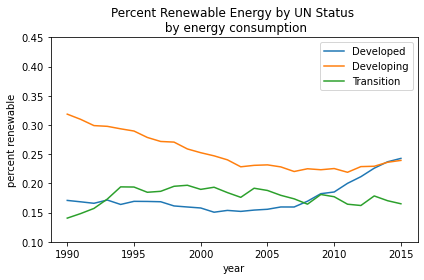

In [18]:
devel=Master[Master["UN Status"]=="Developed"]
develDate=devel.groupby("Date")
develMeanRenewPercent=develDate[renewable].sum()/develDate[total].sum()
plt.plot(develMeanRenewPercent)

ing=Master[Master["UN Status"]=="Developing"]
ingDate=ing.groupby("Date")
ingMeanRenewPercent=ingDate[renewable].sum()/ingDate[total].sum()
plt.plot(ingMeanRenewPercent)

tran=Master[Master["UN Status"]=="Transition"]
tranDate=tran.groupby("Date")
tranMeanRenewPercent=tranDate[renewable].sum()/tranDate[total].sum()
plt.plot(tranMeanRenewPercent)

plt.legend(("Developed","Developing","Transition"))
plt.title("Percent Renewable Energy by UN Status \n by energy consumption")
plt.xlabel("year")
plt.ylabel("percent renewable")
plt.ylim(.1,.45)
plt.tight_layout()

file = os.path.join("PercentRenewableEnergybyUNStatus2.png")
plt.savefig(file)

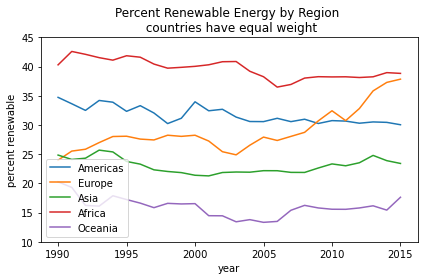

In [19]:
regions=Master["region"].unique()
for region in regions:
    short=Master[Master["region"]==region]
    group=short.groupby("Date")
    average=group[percent].mean()
    plt.plot(average)

plt.legend(regions)
plt.title("Percent Renewable Energy by Region \n countries have equal weight")
plt.xlabel("year")
plt.ylabel("percent renewable")
plt.ylim(10,45)
plt.tight_layout()


file = os.path.join("PercentRenewableEnergybyRegion.png")
plt.savefig(file)

In [20]:
for year in range(1990,2016):
    regionDict={}
    yearDF=Master[Master["Date"]==year]
    for region in regions:
        regionDict[region]=yearDF[yearDF["region"]==region]

    anova=stats.f_oneway(regionDict["Americas"][percent],regionDict["Europe"][percent],regionDict["Asia"][percent],regionDict["Africa"][percent],regionDict["Oceania"][percent])
    print(f"ANOVA result for {year} is {anova}")


ANOVA result for 1990 is F_onewayResult(statistic=2.1300243985942444, pvalue=0.07851143878344741)
ANOVA result for 1991 is F_onewayResult(statistic=2.601309645074508, pvalue=0.0373323151876002)
ANOVA result for 1992 is F_onewayResult(statistic=2.8209956055324836, pvalue=0.026197204721848708)
ANOVA result for 1993 is F_onewayResult(statistic=2.4763594633565513, pvalue=0.04547643229813458)
ANOVA result for 1994 is F_onewayResult(statistic=2.1421107618290254, pvalue=0.07696492046371496)
ANOVA result for 1995 is F_onewayResult(statistic=2.6233801025643793, pvalue=0.035960907151858526)
ANOVA result for 1996 is F_onewayResult(statistic=2.797731085340132, pvalue=0.02718372623757678)
ANOVA result for 1997 is F_onewayResult(statistic=2.799516675802848, pvalue=0.02710568400804333)
ANOVA result for 1998 is F_onewayResult(statistic=2.542692851976832, pvalue=0.04090531140631173)
ANOVA result for 1999 is F_onewayResult(statistic=2.6330747253379747, pvalue=0.03539233722843365)
ANOVA result for 2000 i

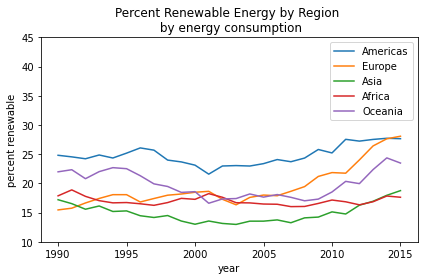

In [21]:
regions=Master["region"].unique()
for region in regions:
    short=Master[Master["region"]==region]
    group=short.groupby("Date")
    average=group[renewable].sum()/group[total].sum()*100
    plt.plot(average)

plt.legend(regions)
plt.title("Percent Renewable Energy by Region \n by energy consumption")
plt.xlabel("year")
plt.ylabel("percent renewable")
plt.ylim(10,45)
plt.tight_layout()

file = os.path.join("PercentRenewableEnergybyRegion2.png")
plt.savefig(file)

In [22]:
Americas=Master[(Master["Date"]==2015)&(Master["region"]=="Americas")]
gb=Americas.groupby("Country Code").sum()
gb.sort_values(percent,ascending=False)

,Date,GDP,GDP Per Capita,Population,Renewable electricity output (GWh) [4.1.2_REN.ELECTRICITY.OUTPUT],Renewable electricity share of total electricity output (%) [4.1_SHARE.RE.IN.ELECTRICITY],Total electricity output (GWh) [4.1.1_TOTAL.ELECTRICITY.OUTPUT],country-code,region-code,sub-region-code,intermediate-region-code
Country Code,,,,,,,,,,,
PRY,2015.0,7.672991e+10,11809.946426,6688746.0,55743.000000,99.998206,5.574400e+04,600,19.0,419.0,5.0
CRI,2015.0,8.040739e+10,18024.491970,4847804.0,10704.000000,99.001110,1.081200e+04,188,19.0,419.0,13.0
URY,2015.0,6.898258e+10,20588.393122,3412009.0,12168.000000,88.558952,1.374000e+04,858,19.0,419.0,5.0
GRL,2015.0,0.000000e+00,0.000000,56114.0,422.857300,81.291526,5.201739e+02,304,19.0,21.0,0.0
BRA,2015.0,3.014755e+12,15059.234368,204471769.0,430230.000000,73.966908,5.816520e+05,76,19.0,419.0,5.0
COL,2015.0,6.303995e+11,14237.583814,47520667.0,47095.000000,68.236811,6.901700e+04,170,19.0,419.0,5.0
PAN,2015.0,1.004790e+11,28436.359829,3968487.0,6726.000000,65.326340,1.029600e+04,591,19.0,419.0,13.0
VEN,2015.0,0.000000e+00,0.000000,30081829.0,74899.000000,63.695042,1.175900e+05,862,19.0,419.0,5.0
CAN,2015.0,1.594900e+12,47770.415612,35702908.0,422643.000000,63.011450,6.707400e+05,124,19.0,21.0,0.0


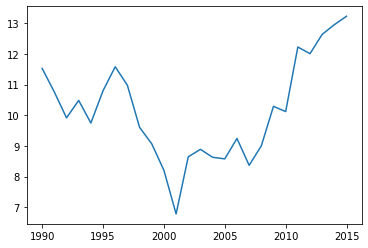

In [23]:
us=Master[Master["Country Code"]=="USA"]
uspercent=us[["Date",percent]]
plt.plot(us["Date"],us[percent])



In [24]:
file = os.path.join("Rice-Boot-Camp-Project-1","InvestmentData.csv")
Inv = pd.read_csv(file)

In [25]:
Inv.head()

,Unnamed: 0,Recipient Country/Area,ISO-code,Region,Project,Year,Investor,Technology,Asset Class,Amount (USD million),Source
0,0,Afghanistan,AFG,Asia,"ADA, MICRO HYDRO POWER",2000,Others,Renewable Hydropower,Grant,0.022474,2000-01 OECD Credit Report System (CRS) Database
1,1,Afghanistan,AFG,Asia,Afghanistan Reconstruction Trust Fund,2017,Others,Multiple renewables*,Grant,3.028126,2017 OECD Credit Report System (CRS) Database
2,2,Afghanistan,AFG,Asia,Afghanistan: Emergency National Solidarity Pro...,2003,WBG,Multiple renewables*,Grant,22.649842,2002-03 OECD Credit Report System (CRS) Database
3,3,Afghanistan,AFG,Asia,Afghanistan: Emergency National Solidarity Pro...,2005,WBG,Multiple renewables*,Grant,5.999401,2004-05 OECD Credit Report System (CRS) Database
4,4,Afghanistan,AFG,Asia,Afghanistan: Emergency National Solidarity Pro...,2006,WBG,Multiple renewables*,Grant,8.302498,2006 OECD Credit Report System (CRS) Database


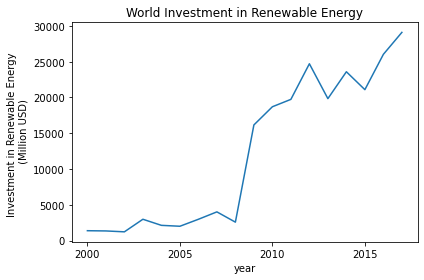

In [26]:
InvYear=Inv.groupby("Year")
invest=InvYear["Amount (USD million)"].sum()
plt.plot(invest)
plt.title("World Investment in Renewable Energy")
plt.xlabel("year")
plt.ylabel("Investment in Renewable Energy \n (Million USD)")
plt.xticks([2000,2005,2010,2015])
plt.tight_layout()

file = os.path.join("WorldInvestmentInRenewableEnergy.png")
plt.savefig(file)

In [27]:
CRD=Master[["Country Code","region","UN Status"]]
CRD=CRD.drop_duplicates()
Inv2=Inv.drop(columns="Region")
Inv2=Inv2.rename(columns={"ISO-code":"Country Code"})
Inv2=Inv2.merge(CRD,on="Country Code")
Inv2

,Unnamed: 0,Recipient Country/Area,Country Code,Project,Year,Investor,Technology,Asset Class,Amount (USD million),Source,region,UN Status
0,0,Afghanistan,AFG,"ADA, MICRO HYDRO POWER",2000,Others,Renewable Hydropower,Grant,0.022474,2000-01 OECD Credit Report System (CRS) Database,Asia,Other
1,1,Afghanistan,AFG,Afghanistan Reconstruction Trust Fund,2017,Others,Multiple renewables*,Grant,3.028126,2017 OECD Credit Report System (CRS) Database,Asia,Other
2,2,Afghanistan,AFG,Afghanistan: Emergency National Solidarity Pro...,2003,WBG,Multiple renewables*,Grant,22.649842,2002-03 OECD Credit Report System (CRS) Database,Asia,Other
3,3,Afghanistan,AFG,Afghanistan: Emergency National Solidarity Pro...,2005,WBG,Multiple renewables*,Grant,5.999401,2004-05 OECD Credit Report System (CRS) Database,Asia,Other
4,4,Afghanistan,AFG,Afghanistan: Emergency National Solidarity Pro...,2006,WBG,Multiple renewables*,Grant,8.302498,2006 OECD Credit Report System (CRS) Database,Asia,Other
...,...,...,...,...,...,...,...,...,...,...,...,...
8100,9270,Zimbabwe,ZWE,STRENGTHEN PRODUCTIVE CAPACITY FOR SOLAR THERM...,2005,Others,Solar energy,Grant,0.469651,2004-05 OECD Credit Report System (CRS) Database,Africa,Developing
8101,9271,Zimbabwe,ZWE,TC AGGREGATED ACTIVITIES,2016,JICA,Multiple renewables*,Grant,0.007757,2016 OECD Credit Report System (CRS) Database,Africa,Developing
8102,9272,Zimbabwe,ZWE,TC AGGREGATED ACTIVITIES,2017,JICA,Multiple renewables*,Grant,0.009594,2017 OECD Credit Report System (CRS) Database,Africa,Developing
8103,9273,Zimbabwe,ZWE,The Project for Public Sector Solar Water Heat...,2011,Others,Solar energy,Grant,1.019630,2011 OECD Credit Report System (CRS) Database,Africa,Developing


In [28]:
Inv2["Asset Class"].unique()

array(['Grant', 'Loan', 'Other Official Flows (non Export Credit)',
       'Equity Investment', 'Credit line', 'Private Development Finance',
       'Guarantee', 'Concessional loan', 'Insurance', 'Bond'],
      dtype=object)

In [29]:
Inv2.groupby("Asset Class").sum()

,Unnamed: 0,Year,Amount (USD million)
Asset Class,,,
Bond,5192,2017,38.485728
Concessional loan,3037,2012,0.227376
Credit line,36206,14082,229.536674
Equity Investment,839865,273656,4851.643844
Grant,25092011,10840069,8668.802524
Guarantee,52970,20137,1124.984132
Insurance,58979,26173,532.074861
Loan,7114359,3952927,161804.996760
Other Official Flows (non Export Credit),2427608,1103555,33988.441448


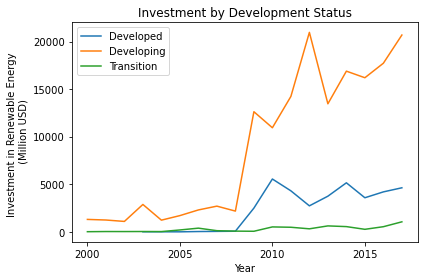

In [30]:
devel=Inv2[Inv2["UN Status"]=="Developed"]
develDate=devel.groupby("Year")
develMeanRenewPercent=develDate["Amount (USD million)"].sum()
plt.plot(develMeanRenewPercent)

ing=Inv2[Inv2["UN Status"]=="Developing"]
ingDate=ing.groupby("Year")
ingMeanRenewPercent=ingDate["Amount (USD million)"].sum()
plt.plot(ingMeanRenewPercent)

tran=Inv2[Inv2["UN Status"]=="Transition"]
tranDate=tran.groupby("Year")
tranMeanRenewPercent=tranDate["Amount (USD million)"].sum()
plt.plot(tranMeanRenewPercent)

plt.legend(("Developed","Developing","Transition"))
plt.title("Investment by Development Status")
plt.xlabel("Year")
plt.ylabel("Investment in Renewable Energy \n (Million USD)")
plt.xticks([2000,2005,2010,2015])
plt.tight_layout()

file = os.path.join("InvestmentInRenewableEnergybyStatus.png")
plt.savefig(file)

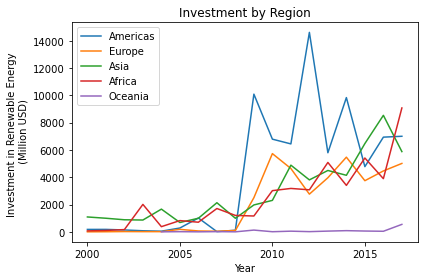

In [31]:
regions=Master["region"].unique()
for region in regions:
    short=Inv2[Inv2["region"]==region]
    group=short.groupby("Year")
    average=group["Amount (USD million)"].sum()
    plt.plot(average)

plt.legend(regions)
plt.title("Investment by Region")
plt.xlabel("Year")
plt.ylabel("Investment in Renewable Energy \n (Million USD)")
plt.xticks([2000,2005,2010,2015])
plt.tight_layout()

file = os.path.join("InvestmentInRenewableEnergybyRegion.png")
plt.savefig(file)

In [32]:
Americas=Inv2[(Inv2["Year"]==2012)&(Inv2["region"]=="Americas")]
gb=Americas.groupby("Country Code").sum()
gb.sort_values("Amount (USD million)",ascending=False)

,Unnamed: 0,Year,Amount (USD million)
Country Code,,,
BRA,98738,179068,11761.546896
CHL,18756,20120,953.334447
CRI,14071,12072,524.323828
MEX,39656,16096,351.303434
URY,35786,8048,278.909941
ARG,498,4024,243.572430
PER,73155,20120,225.787089
NIC,54942,18108,67.982668
CAN,1789,2012,62.447460


In [33]:
Americas=Inv2[(Inv2["Year"]==2009)&(Inv2["region"]=="Americas")]
gb=Americas.groupby("Country Code").sum()
gb.sort_values("Amount (USD million)",ascending=False)

,Unnamed: 0,Year,Amount (USD million)
Country Code,,,
BRA,89307,160720,9855.080152
BOL,5634,18081,96.300243
CHL,22577,24108,52.980656
ARG,4218,36162,37.431331
HTI,10089,6027,14.246625
NIC,61220,20090,8.561160
URY,17911,4018,6.761184
BLZ,485,2009,4.657304
MEX,34569,14063,4.153259


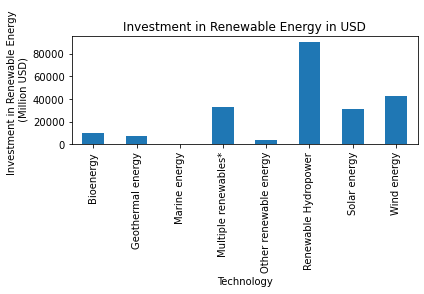

In [34]:
graph=Inv.groupby("Technology")["Amount (USD million)"].sum()
graph.plot(kind="bar",title="Investment in Renewable Energy in USD")
plt.ylabel("Investment in Renewable Energy \n (Million USD)")
plt.tight_layout()

file = os.path.join("InvestmentInRenewableEnergyinUSD.png")
plt.savefig(file)

In [35]:
new1=WorldRenew.loc[2000:2015]
new2=invest.loc[2000:2015]
correlation = stats.pearsonr(new1, new2)
r2=correlation[0]**2
print("investment and percent")
print(correlation)
print(r2)

investment and percent
(0.8986477525068299, 2.2449776220051004e-06)
0.8075677830855766


In [36]:
print(stats.pearsonr(new1, new1.index))

(0.8967559655522299, 2.542051249102187e-06)


In [37]:
print(stats.pearsonr(new2, new2.index))

(0.9011924735096983, 1.8920416515056368e-06)


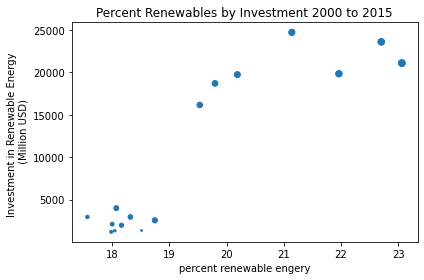

In [38]:
plt.scatter(new1,new2,s=(new1.index-1999)*3)
plt.title("Percent Renewables by Investment 2000 to 2015")
plt.xlabel("percent renewable engery")
plt.ylabel("Investment in Renewable Energy \n (Million USD)")
plt.tight_layout()

file = os.path.join("PercentAndInvestmentScatterWorld.png")
plt.savefig(file)

In [39]:
InvGB=Inv2.groupby(["Country Code","Year"])
InvMerge=InvGB.sum().reset_index(level=[0,1])
InvMerge=InvMerge.merge(Master,left_on=["Country Code","Year"],right_on=["Country Code","Date"])
InvMerge

,Country Code,Year,Unnamed: 0,Amount (USD million),Date,GDP,GDP Per Capita,Population,Country Name,Time Code,...,name,alpha-2,country-code,iso_3166-2,region,sub-region,intermediate-region,region-code,sub-region-code,intermediate-region-code
0,AFG,2000,0,0.022474,2000.0,NaN,NaN,20779953.0,Afghanistan,YR2000,...,Afghanistan,AF,4,ISO 3166-2:AF,Asia,Southern Asia,NaN,142.0,34.0,NaN
1,AFG,2001,113,0.121395,2001.0,NaN,NaN,21606988.0,Afghanistan,YR2001,...,Afghanistan,AF,4,ISO 3166-2:AF,Asia,Southern Asia,NaN,142.0,34.0,NaN
2,AFG,2002,25,3.701781,2002.0,1.982120e+10,1272.900914,22600770.0,Afghanistan,YR2002,...,Afghanistan,AF,4,ISO 3166-2:AF,Asia,Southern Asia,NaN,142.0,34.0,NaN
3,AFG,2003,110,24.878960,2003.0,2.197247e+10,1322.141328,23680871.0,Afghanistan,YR2003,...,Afghanistan,AF,4,ISO 3166-2:AF,Asia,Southern Asia,NaN,142.0,34.0,NaN
4,AFG,2005,75,9.347439,2005.0,2.624565e+10,1376.686376,25654277.0,Afghanistan,YR2005,...,Afghanistan,AF,4,ISO 3166-2:AF,Asia,Southern Asia,NaN,142.0,34.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1509,ZWE,2005,9270,0.469651,2005.0,2.059765e+10,2328.176129,12076699.0,Zimbabwe,YR2005,...,Zimbabwe,ZW,716,ISO 3166-2:ZW,Africa,Sub-Saharan Africa,Eastern Africa,2.0,202.0,14.0
1510,ZWE,2009,9263,0.016032,2009.0,1.920160e+10,1925.364381,12526968.0,Zimbabwe,YR2009,...,Zimbabwe,ZW,716,ISO 3166-2:ZW,Africa,Sub-Saharan Africa,Eastern Africa,2.0,202.0,14.0
1511,ZWE,2011,18537,1.045137,2011.0,2.710160e+10,2556.278431,12894316.0,Zimbabwe,YR2011,...,Zimbabwe,ZW,716,ISO 3166-2:ZW,Africa,Sub-Saharan Africa,Eastern Africa,2.0,202.0,14.0
1512,ZWE,2013,18534,304.794458,2013.0,3.418729e+10,2937.725624,13350356.0,Zimbabwe,YR2013,...,Zimbabwe,ZW,716,ISO 3166-2:ZW,Africa,Sub-Saharan Africa,Eastern Africa,2.0,202.0,14.0


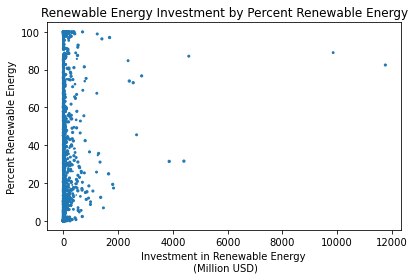

In [40]:
plt.scatter(InvMerge["Amount (USD million)"],InvMerge[percent],s=(InvMerge["Date"]-1999)/3)

plt.title("Renewable Energy Investment by Percent Renewable Energy")
plt.xlabel("Investment in Renewable Energy \n (Million USD)")
plt.ylabel("Percent Renewable Energy")
plt.tight_layout()

file = os.path.join("PercentAndInvestmentScatterByCountry.png")
plt.savefig(file)

In [41]:
correlation = stats.pearsonr(InvMerge["Amount (USD million)"],InvMerge[percent])
r2=correlation[0]**2

print("investment and percent for each country")
print(correlation)
print(r2)

investment and percent for each country
(0.0600373358612811, 0.01947873475155812)
0.0036044816973202693


In [134]:
Investments=InvMerge.groupby("Country Code").sum()
percentages=InvMerge[InvMerge["Date"]==2015][["Country Code",percent]]
combined=percentages.merge(Investments, on="Country Code")

plt.scatter(combined["Amount (USD million)"],combined[percent],s=(combined["Date"]-1999)/3)

plt.title("Renewable Energy Investment by Percent Renewable Energy")
plt.xlabel("Investment in Renewable Energy \n (Million USD)")
plt.ylabel("Percent Renewable Energy")
plt.tight_layout()

file = os.path.join("PercentAndInvestmentScatterByCountry2015.png")
plt.savefig(file)

KeyError: 'Renewable electricity share of total electricity output (%) [4.1_SHARE.RE.IN.ELECTRICITY]'

In [132]:
combined

,Country Code,Year_x,Unnamed: 0_x,Amount (USD million)_x,Date_x,GDP_x,GDP Per Capita_x,Population_x,Country Name,Time Code,...,GDP_y,GDP Per Capita_y,Population_y,Renewable electricity output (GWh) [4.1.2_REN.ELECTRICITY.OUTPUT]_y,Renewable electricity share of total electricity output (%) [4.1_SHARE.RE.IN.ELECTRICITY]_y,Total electricity output (GWh) [4.1.1_TOTAL.ELECTRICITY.OUTPUT]_y,country-code_y,region-code_y,sub-region-code_y,intermediate-region-code_y
0,AFG,2015,143,4.595602,2015.0,7.183170e+10,2212.750899,34413603.0,Afghanistan,YR2015,...,5.749615e+11,23490.038779,4.144918e+08,10616.60,1174.157398,13547.30,60,2130.0,510.0,0.0
1,AGO,2015,167,0.014608,2015.0,2.046036e+11,8036.414092,27884381.0,Angola,YR2015,...,9.812586e+11,49515.492076,1.583542e+08,22162.00,471.069071,34512.00,168,14.0,1414.0,119.0
2,ALB,2015,113,22.412089,2015.0,3.359469e+10,12125.931481,2880703.0,Albania,YR2015,...,3.156647e+11,127682.788280,3.841951e+07,64152.00,1282.715819,64872.00,104,1950.0,507.0,0.0
3,ARG,2015,1124,589.076783,2015.0,8.671768e+11,23934.096282,43131966.0,Argentina,YR2015,...,9.350538e+12,303808.140935,5.640732e+08,524257.00,448.535910,1661441.00,448,266.0,5866.0,70.0
4,ARM,2015,1492,22.364181,2015.0,2.916684e+10,11321.355759,2925553.0,Armenia,YR2015,...,3.066943e+11,129396.042949,4.414485e+07,29646.00,457.458385,97608.00,765,2130.0,2175.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131,VNM,2015,90948,6.073073,2015.0,5.655746e+11,6438.260271,92677076.0,Vietnam,YR2015,...,5.239111e+12,72830.358200,1.376544e+09,494492.00,656.688297,1252296.00,11264,2272.0,560.0,0.0
132,VUT,2015,17995,6.986124,2015.0,8.006746e+08,3042.140841,271130.0,Vanuatu,YR2015,...,4.988976e+09,22080.313900,1.721539e+06,72.03,108.118863,454.72,3836,63.0,378.0,0.0
133,WSM,2015,7567,0.008607,2015.0,1.128476e+09,6007.351296,193513.0,Samoa,YR2015,...,5.226906e+09,29707.449555,9.469560e+05,215.21,175.978025,614.21,4410,45.0,305.0,0.0
134,ZAF,2015,94709,688.144592,2015.0,6.952285e+11,12840.035867,55386367.0,South Africa,YR2015,...,8.130470e+12,178869.390582,7.494045e+08,33411.00,13.779524,3651780.00,10650,30.0,3030.0,270.0


In [42]:
IQR=InvMerge["Amount (USD million)"].quantile(.75)-InvMerge["Amount (USD million)"].quantile(.25)
IQR

51.998526335825744

In [43]:
InvMerge[InvMerge["Amount (USD million)"]>2000]

,Country Code,Year,Unnamed: 0,Amount (USD million),Date,GDP,GDP Per Capita,Population,Country Name,Time Code,...,name,alpha-2,country-code,iso_3166-2,region,sub-region,intermediate-region,region-code,sub-region-code,intermediate-region-code
47,ARG,2014,1535,4401.809407,2014.0,8.398967e+11,23550.305368,42669500.0,Argentina,YR2014,...,Argentina,AR,32,ISO 3166-2:AR,Americas,Latin America and the Caribbean,South America,19.0,419.0,5.0
183,BRA,2009,89307,9855.080152,2009.0,2.572703e+12,13957.679120,193886508.0,Brazil,YR2009,...,Brazil,BR,76,ISO 3166-2:BR,Americas,Latin America and the Caribbean,South America,19.0,419.0,5.0
184,BRA,2010,56271,2361.741794,2010.0,2.798617e+12,14868.330141,195713635.0,Brazil,YR2010,...,Brazil,BR,76,ISO 3166-2:BR,Americas,Latin America and the Caribbean,South America,19.0,419.0,5.0
185,BRA,2011,100405,4580.983175,2011.0,2.970630e+12,15318.306306,197514534.0,Brazil,YR2011,...,Brazil,BR,76,ISO 3166-2:BR,Americas,Latin America and the Caribbean,South America,19.0,419.0,5.0
186,BRA,2012,98738,11761.546896,2012.0,2.998534e+12,15473.712021,199287296.0,Brazil,YR2012,...,Brazil,BR,76,ISO 3166-2:BR,Americas,Latin America and the Caribbean,South America,19.0,419.0,5.0
187,BRA,2013,95909,2857.792707,2013.0,3.133894e+12,15800.038965,201035903.0,Brazil,YR2013,...,Brazil,BR,76,ISO 3166-2:BR,Americas,Latin America and the Caribbean,South America,19.0,419.0,5.0
188,BRA,2014,76808,2549.443988,2014.0,3.187155e+12,15744.347111,202763735.0,Brazil,YR2014,...,Brazil,BR,76,ISO 3166-2:BR,Americas,Latin America and the Caribbean,South America,19.0,419.0,5.0
189,BRA,2015,135724,2406.448739,2015.0,3.014755e+12,15059.234368,204471769.0,Brazil,YR2015,...,Brazil,BR,76,ISO 3166-2:BR,Americas,Latin America and the Caribbean,South America,19.0,419.0,5.0
407,ECU,2010,18369,2672.279897,2010.0,1.364557e+11,10340.968231,15011117.0,Ecuador,YR2010,...,Ecuador,EC,218,ISO 3166-2:EC,Americas,Latin America and the Caribbean,South America,19.0,419.0,5.0
1057,PAK,2015,126999,3865.048006,2015.0,8.720970e+11,4278.346427,199426964.0,Pakistan,YR2015,...,Pakistan,PK,586,ISO 3166-2:PK,Asia,Southern Asia,NaN,142.0,34.0,NaN


investment and percent for each country
(0.0020679227188909258, 0.9361335244546342)
4.276304371305238e-06


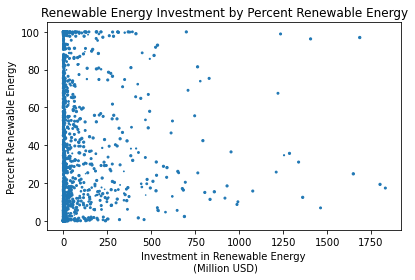

In [44]:
InvNoBra=InvMerge.drop([186,183,185,47,1057,187,407,188,189,184])
plt.scatter(InvNoBra["Amount (USD million)"],InvNoBra[percent],s=(InvNoBra["Date"]-1999)/3)

plt.title("Renewable Energy Investment by Percent Renewable Energy")
plt.xlabel("Investment in Renewable Energy \n (Million USD)")
plt.ylabel("Percent Renewable Energy")
plt.tight_layout()

correlation = stats.pearsonr(InvNoBra["Amount (USD million)"],InvNoBra[percent])
r2=correlation[0]**2

print("investment and percent for each country")
print(correlation)
print(r2)

file = os.path.join("PercentAndInvestmentScatterWithoutBrazil.png")
plt.savefig(file)

investment and percent for each country
(0.0020679227188909258, 0.9361335244546342)
4.276304371305238e-06


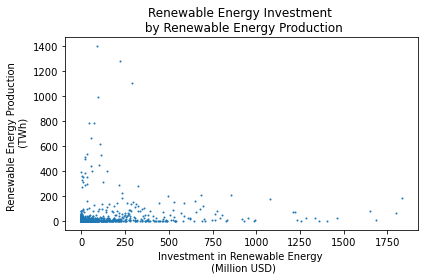

In [90]:
energy = InvNoBra[renewable]/1000
plt.scatter(InvNoBra["Amount (USD million)"],energy,s=1)

plt.title("Renewable Energy Investment \n by Renewable Energy Production")
plt.xlabel("Investment in Renewable Energy \n (Million USD)")
plt.ylabel("Renewable Energy Production \n (TWh)")
plt.tight_layout()

correlation = stats.pearsonr(InvNoBra["Amount (USD million)"],InvNoBra[percent])
r2=correlation[0]**2

print("investment and percent for each country")
print(correlation)
print(r2)


In [46]:
InvNoBra[InvNoBra["Amount (USD million)"]>1000].sort_values(percent)[["Country Name","Amount (USD million)",percent]]

,Country Name,Amount (USD million),Renewable electricity share of total electricity output (%) [4.1_SHARE.RE.IN.ELECTRICITY]
494,United Kingdom,1462.429471,6.812813
811,Morocco,1360.843285,12.387810
637,India,1076.954615,15.732973
636,India,1830.990766,17.316963
498,United Kingdom,1800.738130,19.262854
499,United Kingdom,1648.863793,24.840050
662,Italy,1210.147019,25.760360
1054,Pakistan,1337.664309,31.060598
1166,Sudan,1254.824249,34.675015
233,Chile,1285.839141,35.666872


In [47]:
InvPerGDP=[]
for index,row in InvNoBra.iterrows():
    
    energyPerCapita=(row["Amount (USD million)"]*1000000)/row["GDP"]
    newdict={"Country Name":row["Country Name"],"Date":row["Date"],"Investment/ GDP":energyPerCapita}
    InvPerGDP.append(newdict)
    
InvPerGDPDF=pd.DataFrame(InvPerGDP)
InvNoBra=InvNoBra.merge(InvPerGDPDF,on=["Country Name","Date"])
InvNoBra

,Country Code,Year,Unnamed: 0,Amount (USD million),Date,GDP,GDP Per Capita,Population,Country Name,Time Code,...,alpha-2,country-code,iso_3166-2,region,sub-region,intermediate-region,region-code,sub-region-code,intermediate-region-code,Investment/ GDP
0,AFG,2000,0,0.022474,2000.0,NaN,NaN,20779953.0,Afghanistan,YR2000,...,AF,4,ISO 3166-2:AF,Asia,Southern Asia,NaN,142.0,34.0,NaN,NaN
1,AFG,2001,113,0.121395,2001.0,NaN,NaN,21606988.0,Afghanistan,YR2001,...,AF,4,ISO 3166-2:AF,Asia,Southern Asia,NaN,142.0,34.0,NaN,NaN
2,AFG,2002,25,3.701781,2002.0,1.982120e+10,1272.900914,22600770.0,Afghanistan,YR2002,...,AF,4,ISO 3166-2:AF,Asia,Southern Asia,NaN,142.0,34.0,NaN,1.867587e-04
3,AFG,2003,110,24.878960,2003.0,2.197247e+10,1322.141328,23680871.0,Afghanistan,YR2003,...,AF,4,ISO 3166-2:AF,Asia,Southern Asia,NaN,142.0,34.0,NaN,1.132278e-03
4,AFG,2005,75,9.347439,2005.0,2.624565e+10,1376.686376,25654277.0,Afghanistan,YR2005,...,AF,4,ISO 3166-2:AF,Asia,Southern Asia,NaN,142.0,34.0,NaN,3.561519e-04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1499,ZWE,2005,9270,0.469651,2005.0,2.059765e+10,2328.176129,12076699.0,Zimbabwe,YR2005,...,ZW,716,ISO 3166-2:ZW,Africa,Sub-Saharan Africa,Eastern Africa,2.0,202.0,14.0,2.280120e-05
1500,ZWE,2009,9263,0.016032,2009.0,1.920160e+10,1925.364381,12526968.0,Zimbabwe,YR2009,...,ZW,716,ISO 3166-2:ZW,Africa,Sub-Saharan Africa,Eastern Africa,2.0,202.0,14.0,8.349508e-07
1501,ZWE,2011,18537,1.045137,2011.0,2.710160e+10,2556.278431,12894316.0,Zimbabwe,YR2011,...,ZW,716,ISO 3166-2:ZW,Africa,Sub-Saharan Africa,Eastern Africa,2.0,202.0,14.0,3.856365e-05
1502,ZWE,2013,18534,304.794458,2013.0,3.418729e+10,2937.725624,13350356.0,Zimbabwe,YR2013,...,ZW,716,ISO 3166-2:ZW,Africa,Sub-Saharan Africa,Eastern Africa,2.0,202.0,14.0,8.915432e-03


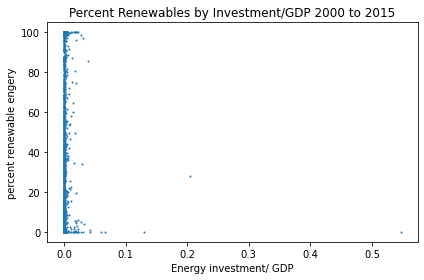

In [125]:
forGraphingPurposes=InvNoBra[["Country Code","Year",percent,"Investment/ GDP"]]
forGraphingPurposes.dropna()
plt.scatter(forGraphingPurposes["Investment/ GDP"],forGraphingPurposes[percent],s=1)

plt.title("Percent Renewables by Investment/GDP 2000 to 2015")
plt.ylabel("percent renewable engery")
plt.xlabel("Energy investment/ GDP")
plt.tight_layout()

file = os.path.join("PercentAndInvestmentByGDPScatter.png")
plt.savefig(file)

In [49]:
forGraphingPurposes[forGraphingPurposes["Investment/ GDP"]>.0000001]

,Country Code,Year,Renewable electricity share of total electricity output (%) [4.1_SHARE.RE.IN.ELECTRICITY],Investment/ GDP
2,AFG,2002,79.063971,1.867587e-04
3,AFG,2003,70.249729,1.132278e-03
4,AFG,2005,74.061810,3.561519e-04
5,AFG,2006,70.755750,3.567650e-04
6,AFG,2007,72.000000,4.441295e-04
...,...,...,...,...
1499,ZWE,2005,52.432259,2.280120e-05
1500,ZWE,2009,75.641201,8.349508e-07
1501,ZWE,2011,57.855903,3.856365e-05
1502,ZWE,2013,53.939394,8.915432e-03


investment/GDP and percent for each country
(0.10391992269556934, 0.00010686873810821315)
0.010799350333053107


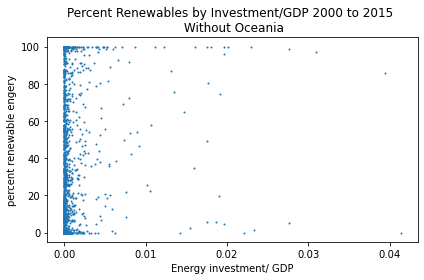

In [126]:
todrop=InvNoBra[InvNoBra["region"]=="Oceania"]["Country Code"].unique()
for index,row in forGraphingPurposes.iterrows():
    if row["Country Code"] in todrop:
        forGraphingPurposes=forGraphingPurposes.drop(index)
        
plt.scatter(forGraphingPurposes["Investment/ GDP"],forGraphingPurposes[percent],s=1)
plt.title("Percent Renewables by Investment/GDP 2000 to 2015 \n Without Oceania")
plt.ylabel("percent renewable engery")
plt.xlabel("Energy investment/ GDP")
plt.tight_layout()

forGraphingPurposes=forGraphingPurposes.dropna()

correlation = stats.pearsonr(forGraphingPurposes["Investment/ GDP"],forGraphingPurposes[percent])
r2=correlation[0]**2

print("investment/GDP and percent for each country")
print(correlation)
print(r2)

file = os.path.join("PercentAndInvestmentByGDPScatterWithoutOceania.png")
plt.savefig(file)

investment/GDP and percent for each country
(0.09469217461487558, 0.3056604402778635)
0.008966607933294088


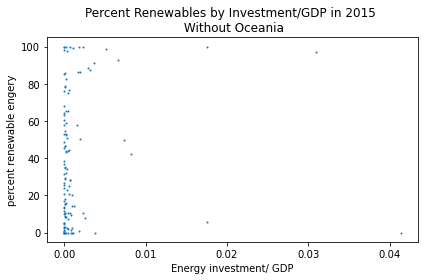

In [127]:
todrop=InvNoBra[InvNoBra["region"]=="Oceania"]["Country Code"].unique()
for index,row in forGraphingPurposes.iterrows():
    if row["Country Code"] in todrop:
        forGraphingPurposes=forGraphingPurposes.drop(index)
forGraphingPurposes2014=forGraphingPurposes[forGraphingPurposes["Year"]==2015]
plt.scatter(forGraphingPurposes2014["Investment/ GDP"],forGraphingPurposes2014[percent],s=1)
plt.title("Percent Renewables by Investment/GDP in 2015 \n Without Oceania")
plt.ylabel("percent renewable engery")
plt.xlabel("Energy investment/ GDP")
plt.tight_layout()

forGraphingPurposes=forGraphingPurposes2014.dropna()

correlation = stats.pearsonr(forGraphingPurposes2014["Investment/ GDP"],forGraphingPurposes2014[percent])
r2=correlation[0]**2

print("investment/GDP and percent for each country")
print(correlation)
print(r2)

file = os.path.join("PercentAndInvestmentByGDPScatterWithoutOceania2015.png")
plt.savefig(file)

In [51]:
forGraphingPurposes[forGraphingPurposes["Investment/ GDP"]>.00000004]

,Country Code,Year,Renewable electricity share of total electricity output (%) [4.1_SHARE.RE.IN.ELECTRICITY],Investment/ GDP
2,AFG,2002,79.063971,1.867587e-04
3,AFG,2003,70.249729,1.132278e-03
4,AFG,2005,74.061810,3.561519e-04
5,AFG,2006,70.755750,3.567650e-04
6,AFG,2007,72.000000,4.441295e-04
...,...,...,...,...
1499,ZWE,2005,52.432259,2.280120e-05
1500,ZWE,2009,75.641201,8.349508e-07
1501,ZWE,2011,57.855903,3.856365e-05
1502,ZWE,2013,53.939394,8.915432e-03


In [52]:
Oil=Oil.rename(columns={"Row Labels":"Years"})
Oil=Oil.set_index("Years")


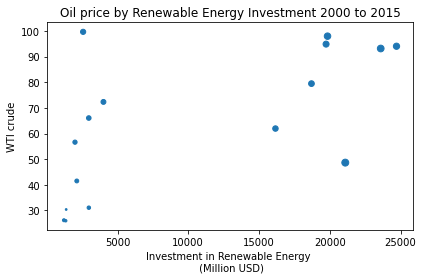

In [53]:
new3=Oil.loc["2000":"2015"]
plt.scatter(new2,new3,s=(new1.index-1999)*3)
plt.title("Oil price by Renewable Energy Investment 2000 to 2015")
plt.xlabel("Investment in Renewable Energy \n (Million USD)")
plt.ylabel("WTI crude")
plt.tight_layout()

file = os.path.join("OilpriceAndInvestmentScatter.png")
plt.savefig(file)

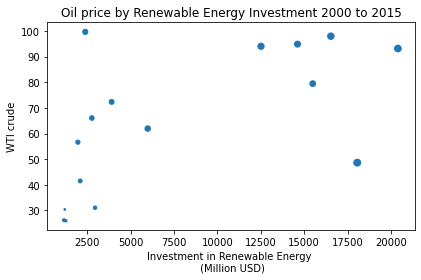

In [54]:
new3=Oil.loc["2000":"2015"]
new2NoBra=Inv2.drop(Inv2[Inv2["Country Code"]=="BRA"].index)
new2NoBra=new2NoBra.groupby("Year")["Amount (USD million)"].sum()
new2NoBra=new2NoBra.loc["2000":"2015"]
plt.scatter(new2NoBra,new3,s=(new1.index-1999)*3)
plt.title("Oil price by Renewable Energy Investment 2000 to 2015")
plt.xlabel("Investment in Renewable Energy \n (Million USD)")
plt.ylabel("WTI crude")
plt.tight_layout()

file = os.path.join("OilpriceAndInvestmentScatterWithoutBrazil.png")
plt.savefig(file)

In [55]:
new3=new3.squeeze()

In [56]:
correlation = stats.pearsonr(new2, new3)
r2=correlation[0]**2
print("investment and oil price")
print(correlation)
print(r2)

investment and oil price
(0.6382165194286151, 0.007803524769507527)
0.4073203256715759


In [57]:
Master.dtypes

Country Code                                                                                        object
Date                                                                                               float64
GDP                                                                                                float64
GDP Per Capita                                                                                     float64
Population                                                                                         float64
Country Name                                                                                        object
Time Code                                                                                           object
Access to Clean Fuels and Technologies for cooking (% of total population) [2.1_ACCESS.CFT.TOT]     object
Access to electricity (% of rural population with access) [1.2_ACCESS.ELECTRICITY.RURAL]            object
Access to electricity (% of total pop

In [58]:
perGDP=Master[["GDP",percent]]
perGDP=perGDP.dropna()
correlation = stats.pearsonr(perGDP["GDP"],perGDP[percent])
r2=correlation[0]**2
print("GDP and Percent Renewables")
print(correlation)
print(r2)

GDP and Percent Renewables
(-0.09164105493246114, 2.2843628562220718e-10)
0.008398082949134359


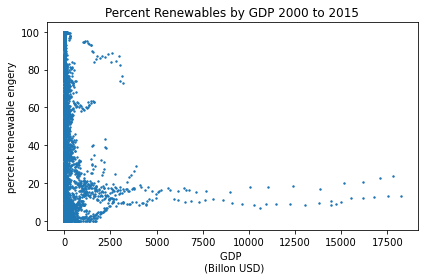

In [59]:
gdpInBillions=perGDP["GDP"]/1000000000
plt.scatter(gdpInBillions,perGDP[percent],s=2)
plt.title("Percent Renewables by GDP 2000 to 2015")
plt.ylabel("percent renewable engery")
plt.xlabel("GDP \n (Billon USD)")
plt.tight_layout()

file = os.path.join("PercentByGDP.png")
plt.savefig(file)

In [60]:
Master[Master["GDP"]>5000000000000]["Country Name"].unique()

array(['United States', 'China', 'India', 'Japan'], dtype=object)

In [61]:
perGDPperC=Master[["GDP Per Capita",percent]]
perGDPperC=perGDPperC.dropna()
correlation = stats.pearsonr(perGDPperC["GDP Per Capita"],perGDPperC[percent])
r2=correlation[0]**2
print("GDP Per Capita and Percent Renewables")
print(correlation)
print(r2)

GDP Per Capita and Percent Renewables
(-0.24976264236839457, 2.3100002555679917e-67)
0.06238137752284257


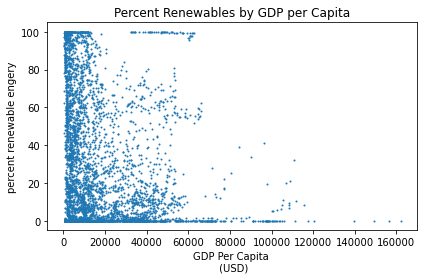

In [62]:
plt.scatter(perGDPperC["GDP Per Capita"],perGDPperC[percent],s=1)
plt.title("Percent Renewables by GDP per Capita")
plt.ylabel("percent renewable engery")
plt.xlabel("GDP Per Capita \n (USD)")
plt.tight_layout()

file = os.path.join("PercentByGDPperCapita.png")
plt.savefig(file)

In [74]:
Master[Master["GDP Per Capita"]>70000]["Country Name"].unique()

array(['Luxembourg', 'Ireland', 'Brunei Darussalam', 'Cayman Islands',
       'Kuwait', 'Macao SAR, China', 'Qatar', 'Singapore',
       'United Arab Emirates'], dtype=object)

In [108]:
perGDPperCWo=perGDPperC.drop(perGDPperC[perGDPperC["GDP Per Capita"]>70000].index)
perGDPperCWo2014=perGDPperCWo[perGDPperCWo["Date"]==2014]
plt.scatter(perGDPperCWo2014["GDP Per Capita"],perGDPperCWo2014[percent],s=1)
plt.title("Percent Renewables by GDP per Capita")
plt.ylabel("percent renewable engery")
plt.xlabel("GDP Per Capita \n (USD)")
plt.tight_layout()

perGDPperCWo2014=perGDPperCWo2014.dropna()
correlation = stats.pearsonr(perGDPperCWo2014["GDP Per Capita"],perGDPperCWo2014[percent])
r2=correlation[0]**2
print("GDP Per Capita and Percent Renewables without Outliers")
print(correlation)
print(r2)

file = os.path.join("PercentByGDPperCapitaWoOutliers2014.png")
plt.savefig(file)

KeyError: 'Date'

In [ ]:
perGDPperCWo=perGDPperC.drop(perGDPperC[perGDPperC["GDP Per Capita"]>70000].index)
plt.scatter(perGDPperCWo["GDP Per Capita"],perGDPperCWo[percent],s=1)
plt.title("Percent Renewables by GDP per Capita")
plt.ylabel("percent renewable engery")
plt.xlabel("GDP Per Capita \n (USD)")
plt.tight_layout()

perGDPperCWo=perGDPperCWo.dropna()
correlation = stats.pearsonr(perGDPperCWo["GDP Per Capita"],perGDPperCWo[percent])
r2=correlation[0]**2
print("GDP Per Capita and Percent Renewables without Outliers")
print(correlation)
print(r2)

file = os.path.join("PercentByGDPperCapitaWoOutliers.png")
plt.savefig(file)

In [64]:
totalPer=Master[[total,percent]]
totalPer=totalPer.dropna()
correlation = stats.pearsonr(totalPer[total],totalPer[percent])
r2=correlation[0]**2
print("Total Energy Production and Percent Renewables")
print(correlation)
print(r2)

Total Energy Production and Percent Renewables
(-0.06672561680625753, 8.800175161722299e-07)
0.004452307938175518


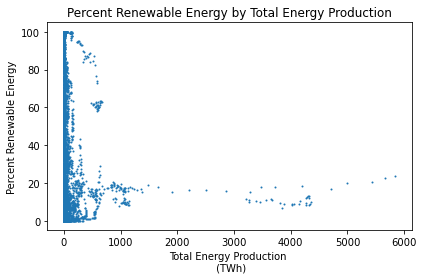

In [65]:
energy=totalPer[total]/1000
plt.scatter(energy,totalPer[percent],s=1)
plt.title("Percent Renewable Energy by Total Energy Production")
plt.xlabel("Total Energy Production \n (TWh)")
plt.ylabel("Percent Renewable Energy")
plt.tight_layout()

file = os.path.join("RenewableByTotal.png")
plt.savefig(file)

In [66]:
Master[Master[total]>1000000]["Country Name"].unique()

array(['United States', 'China', 'India', 'Japan', 'Russian Federation'],
      dtype=object)

In [67]:
x=Master[["Country Name","Date",total,"Population",renewable,percent]]
energyPerCapitaList=[]
for index,row in x.iterrows():
    
    energyPerCapita=row[total]/row["Population"]*1000000
    newdict={"Country Name":row["Country Name"],"Date":row["Date"],"EnergyPerCapita (KWh)":energyPerCapita}
    energyPerCapitaList.append(newdict)
    
energyDF=pd.DataFrame(energyPerCapitaList)
x=x.merge(energyDF,on=["Country Name","Date"])
x

,Country Name,Date,Total electricity output (GWh) [4.1.1_TOTAL.ELECTRICITY.OUTPUT],Population,Renewable electricity output (GWh) [4.1.2_REN.ELECTRICITY.OUTPUT],Renewable electricity share of total electricity output (%) [4.1_SHARE.RE.IN.ELECTRICITY],EnergyPerCapita (KWh)
0,United States,2015.0,4297048.0,320635163.0,568439.0,13.228593,13401.674226
1,United States,2014.0,4319156.0,318301008.0,559496.0,12.953827,13569.407232
2,United States,2013.0,4287114.0,315993715.0,541802.0,12.637919,13567.086295
3,United States,2012.0,4270884.0,313830990.0,512822.0,12.007397,13608.866352
4,United States,2011.0,4326635.0,311556874.0,528962.0,12.225714,13887.143443
...,...,...,...,...,...,...,...
5415,Zimbabwe,1994.0,7535.0,11261744.0,2095.0,27.803583,669.079318
5416,Zimbabwe,1993.0,7468.0,11092766.0,2062.0,27.611141,673.231546
5417,Zimbabwe,1992.0,8237.0,10900502.0,3161.0,38.375622,755.653272
5418,Zimbabwe,1991.0,8924.0,10680995.0,3152.0,35.320484,835.502685


Total Energy Production and Percent Renewables
(-0.053009660791273394, 9.600026440938081e-05)
0.0028100241372058677


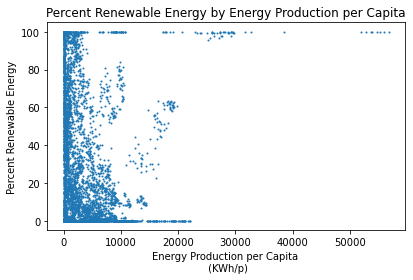

In [68]:
plt.scatter(x["EnergyPerCapita (KWh)"],x[percent],s=1)
plt.title("Percent Renewable Energy by Energy Production per Capita")
plt.xlabel("Energy Production per Capita \n (KWh/p)")
plt.ylabel("Percent Renewable Energy")
plt.tight_layout()

x=x.dropna()
correlation = stats.pearsonr(x["EnergyPerCapita (KWh)"],x[percent])
r2=correlation[0]**2
print("Total Energy Production and Percent Renewables")
print(correlation)
print(r2)

file = os.path.join("PercentByEnergyPerCapita.png")
plt.savefig(file)

Total Energy Production and Percent Renewables
(0.012298991732073543, 0.8590382059045482)
0.00015126519762561337


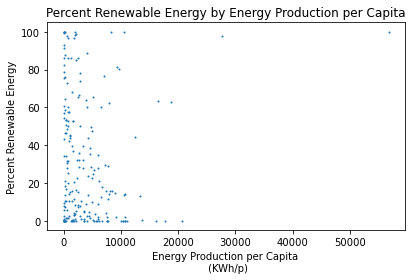

In [118]:
x2014=x[x["Date"]==2015]
plt.scatter(x2014["EnergyPerCapita (KWh)"],x2014[percent],s=1)
plt.title("Percent Renewable Energy by Energy Production per Capita")
plt.xlabel("Energy Production per Capita \n (KWh/p)")
plt.ylabel("Percent Renewable Energy")
plt.tight_layout()

x=x.dropna()
correlation = stats.pearsonr(x2014["EnergyPerCapita (KWh)"],x2014[percent])
r2=correlation[0]**2
print("Total Energy Production and Percent Renewables")
print(correlation)
print(r2)

file = os.path.join("PercentByEnergyPerCapita2015.png")
plt.savefig(file)

In [69]:
x.groupby("Country Name").max().sort_values("EnergyPerCapita (KWh)",ascending=False).head(20)

,Date,Total electricity output (GWh) [4.1.1_TOTAL.ELECTRICITY.OUTPUT],Population,Renewable electricity output (GWh) [4.1.2_REN.ELECTRICITY.OUTPUT],Renewable electricity share of total electricity output (%) [4.1_SHARE.RE.IN.ELECTRICITY],EnergyPerCapita (KWh)
Country Name,,,,,,
Iceland,2015.0,18799.000,330815.0,18795.000,99.988380,56826.322869
Norway,2015.0,146644.000,5188607.0,143645.000,99.817269,31732.809437
Bahrain,2015.0,28484.000,1371851.0,0.000,0.000000,22019.358087
Kuwait,2015.0,67918.000,3835591.0,0.000,0.000000,20056.267252
Canada,2015.0,670740.000,35702908.0,422643.000,63.298033,19735.427510
Sweden,2015.0,166436.000,9799186.0,102442.000,63.262748,18164.987253
Qatar,2015.0,41499.000,2565710.0,0.000,0.000000,17618.379907
Finland,2015.0,85845.000,5479531.0,30525.000,44.499031,16419.696980
United States,2015.0,4354363.000,320635163.0,568439.000,13.228593,14445.506663


In [70]:
EU=["DEU","FRA","ITA","SWE","POL","ESP","NLD","GRC","ROU","HRV","DNK","IRL","BGR","BEL","PRT","AUT","CZE","FIN","HUN","LUX",
             "CYP","LTU","SVN","MLT","EST","LVA","SVK"]
EUDF=pd.DataFrame()
for cc in EU:
    rows=Master[Master["Country Code"]==cc]
    EUDF=EUDF.append(rows)
EUGB=EUDF.groupby("Date")
euDF=EUGB[[total,"Population",renewable,"GDP"]].sum()

energyPerCapitaList=[]
for index,row in euDF.iterrows():
    
    energyPerCapita=row[total]/row["Population"]*1000000
    gdpPC=row["GDP"]/row["Population"]
    percRen=row[renewable]/row[total]*100
    newdict={"Date":index,"EnergyPerCapita (KWh)":energyPerCapita,"GDP Per Capita":gdpPC,"Country Name":"European Union","Country Code":"EU",percent:percRen}
    energyPerCapitaList.append(newdict)
    
energyDF=pd.DataFrame(energyPerCapitaList)
euDF=euDF.merge(energyDF,on="Date")
euDF

,Date,Total electricity output (GWh) [4.1.1_TOTAL.ELECTRICITY.OUTPUT],Population,Renewable electricity output (GWh) [4.1.2_REN.ELECTRICITY.OUTPUT],GDP,EnergyPerCapita (KWh),GDP Per Capita,Country Name,Country Code,Renewable electricity share of total electricity output (%) [4.1_SHARE.RE.IN.ELECTRICITY]
0,1990.0,2258954.0,420477979.0,303472.0,6.037500e+12,5372.347930,14358.658081,European Union,EU,13.434182
1,1991.0,2298720.0,421730525.0,316670.0,6.415832e+12,5450.684415,15213.108680,European Union,EU,13.775927
2,1992.0,2283189.0,422963892.0,329899.0,6.666149e+12,5398.070718,15760.563392,European Union,EU,14.449045
3,1993.0,2285610.0,424341130.0,340284.0,6.798434e+12,5386.256100,16021.151714,European Union,EU,14.888104
4,1994.0,2323954.0,425399124.0,352405.0,7.129493e+12,5462.996675,16759.539512,European Union,EU,15.164026
5,1995.0,2390084.0,426203343.0,354659.0,7.554054e+12,5607.849021,17724.061269,European Union,EU,14.838767
6,1996.0,2473113.0,426896863.0,356734.0,7.818830e+12,5793.233013,18315.500348,European Union,EU,14.424493
7,1997.0,2486252.0,427538058.0,368424.0,8.148474e+12,5815.276450,19059.062169,European Union,EU,14.818450
8,1998.0,2536851.0,428109863.0,386044.0,8.546954e+12,5925.700899,19964.393137,European Union,EU,15.217449
9,1999.0,2562050.0,428815493.0,388164.0,8.894708e+12,5974.714165,20742.506139,European Union,EU,15.150524


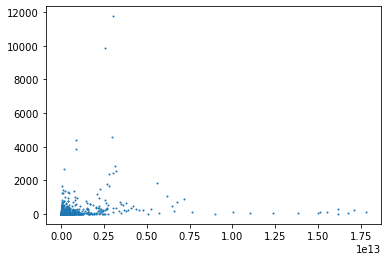

In [71]:
plt.scatter(InvMerge["GDP"],InvMerge["Amount (USD million)"],s=1)

investment and GDP
(0.14990106346618287, 9.031261561373154e-05)
0.022470328828292585


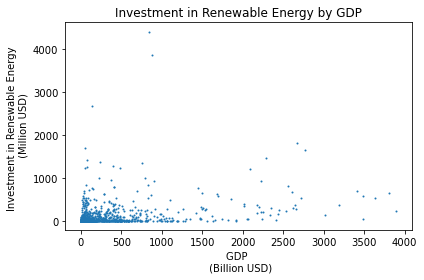

In [135]:
graphThis=InvMerge.drop(InvMerge[InvMerge["Country Code"]=="CHN"].index)
graphThis=graphThis.drop(graphThis[graphThis["Country Code"]=="CHN"].index)
graphThis=graphThis.drop(graphThis[graphThis["Country Code"]=="USA"].index)
graphThis=graphThis.drop(graphThis[graphThis["Country Code"]=="BRA"].index)
graphThis=graphThis.drop(graphThis[graphThis["Country Code"]=="IND"].index)
#graphThis=graphThis.drop(graphThis[graphThis["Amount (USD million)"]>2000].index)
dollabills=graphThis["GDP"]/1000000000
plt.scatter(dollabills,graphThis["Amount (USD million)"],s=1)
graphThis=graphThis.dropna()
correlation = stats.pearsonr(graphThis["GDP"],graphThis["Amount (USD million)"])
r2=correlation[0]**2
print("investment and GDP")
print(correlation)
print(r2)

plt.title("Investment in Renewable Energy by GDP")
plt.xlabel("GDP \n (Billion USD)")
plt.ylabel("Investment in Renewable Energy \n (Million USD)")
plt.tight_layout()

file = os.path.join("InvestmentByGDP.png")
plt.savefig(file)

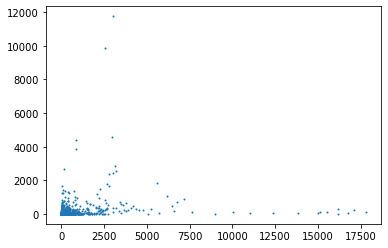

In [136]:
graphThis=InvMerge
#graphThis=graphThis.drop(graphThis[graphThis["Amount (USD million)"]>2000].index)
dollabills=graphThis["GDP"]/1000000000
plt.scatter(dollabills,graphThis["Amount (USD million)"],s=1)

investment and GDP
(0.3611731320480497, 0.003926032947835522)
0.13044603131339794


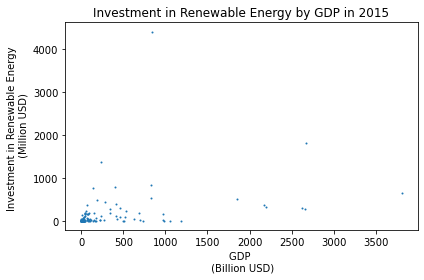

In [117]:
InvMerge2015=InvMerge[InvMerge["Year"]==2015]

graphThis=InvMerge2014.drop(InvMerge2014[InvMerge2014["Country Code"]=="CHN"].index)
graphThis=graphThis.drop(graphThis[graphThis["Country Code"]=="CHN"].index)
graphThis=graphThis.drop(graphThis[graphThis["Country Code"]=="USA"].index)
graphThis=graphThis.drop(graphThis[graphThis["Country Code"]=="BRA"].index)
graphThis=graphThis.drop(graphThis[graphThis["Country Code"]=="IND"].index)
#graphThis=graphThis.drop(graphThis[graphThis["Amount (USD million)"]>2000].index)
dollabills=graphThis["GDP"]/1000000000
plt.scatter(dollabills,graphThis["Amount (USD million)"],s=1)
graphThis=graphThis.dropna()
correlation = stats.pearsonr(graphThis["GDP"],graphThis["Amount (USD million)"])
r2=correlation[0]**2
print("investment and GDP")
print(correlation)
print(r2)

plt.title("Investment in Renewable Energy by GDP in 2015")
plt.xlabel("GDP \n (Billion USD)")
plt.ylabel("Investment in Renewable Energy \n (Million USD)")
plt.tight_layout()

file = os.path.join("InvestmentByGDP.png")
plt.savefig(file)

In [140]:
TotalInv=Inv2.groupby("Country Code").sum()["Amount (USD million)"]

investment and GDP
(0.09038711957866871, 0.2383235479360314)
0.008169831385728557


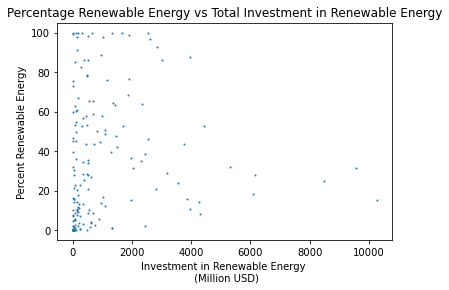

In [154]:
MasterIn2015=Master[Master["Date"]==2015]
MasterIn2015=MasterIn2015.merge(TotalInv,on="Country Code")
MasterIn2015=MasterIn2015.drop(MasterIn2015[MasterIn2015["Country Code"]=="BRA"].index)

plt.scatter(MasterIn2015["Amount (USD million)"],MasterIn2015[percent],s=1)

MasterIn2015.dropna()

plt.title("Percentage Renewable Energy vs Total Investment in Renewable Energy")
plt.xlabel("Investment in Renewable Energy \n (Million USD)")
plt.ylabel("Percent Renewable Energy")

correlation = stats.pearsonr(MasterIn2015["Amount (USD million)"],MasterIn2015[percent])
r2=correlation[0]**2
print("investment and GDP")
print(correlation)
print(r2)